# Modelling Data

## Hierachical clustering
Here it is explain only hierarchical clustering but with R we can do tons of statistical and ML modelling. Here we use the dplyr library (as usual i'm not able to import in jupyter this library but in Rstudio it will be fine)

In [1]:
library(datasets)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
cars <- mtcars[, c(1:4, 6:7, 9:11)] #all rows, select 1to4, 6and7
head(cars)

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
Mazda RX4,21.0,6,160,110,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6,160,110,2.875,17.02,1,4,4
Datsun 710,22.8,4,108,93,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8,360,175,3.440,17.02,0,3,2
Valiant,18.1,6,225,105,3.460,20.22,0,3,1


Compute and plot clusters

In [3]:
library(dplyr)

ERROR: Error: package or namespace load failed for 'dplyr' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.0 is required


In [4]:
hc <- cars %>% #Get cars data
      dist %>% #Compute distance/dissimilarity matrix
      hclust #computer hierarchical clusters

plot(hc)

rect.hclust(hc, k=2 , border='blue')

ERROR: Error in cars %>% dist %>% hclust: non trovo la funzione "%>%"


## PCA analysis

Principal component Analysis or Dimensionality reduction


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3391 1.5299 0.71836 0.46491 0.38903 0.35099 0.31714
Proportion of Variance 0.6079 0.2601 0.05734 0.02402 0.01682 0.01369 0.01118
Cumulative Proportion  0.6079 0.8680 0.92537 0.94939 0.96620 0.97989 0.99107
                           PC8    PC9
Standard deviation     0.24070 0.1499
Proportion of Variance 0.00644 0.0025
Cumulative Proportion  0.99750 1.0000

Standard deviations (1, .., p=9):
[1] 2.3391410 1.5299383 0.7183646 0.4649052 0.3890348 0.3509911 0.3171373
[8] 0.2406989 0.1498962

Rotation (n x k) = (9 x 9):
            PC1         PC2         PC3        PC4         PC5          PC6
mpg  -0.4023287  0.02205294 -0.17272803 -0.1366169  0.31654561 -0.718609897
cyl   0.4068870  0.03589482 -0.27747610  0.1410976  0.02066646 -0.214224005
disp  0.4046964 -0.06479590 -0.17669890 -0.5089434  0.21525777  0.010052074
hp    0.3699702  0.26518848 -0.01046827 -0.1273173  0.42166543 -0.254229405
wt    0.3850686 -0.15955242  0.33740464 -0.4469327 -0.21141143  0.002897706
qsec -0.2168575 -0.48343885  0.54815205 -0.2545226  0.05466817 -0.226660704
am   -0.2594512  0.46039449 -0.19492256 -0.5354196 -0.55331460 -0.087616182
gear -0.2195660  0.50608232  0.34579810 -0.1799814  0.50533262  0.393990378
carb  0.2471604  0.44322600  0.53847588  0.3203064 -0.25696817 -0.398353829
            PC7        PC8         PC9
mpg   0.3633216 -0.1487806  0.13567069
c

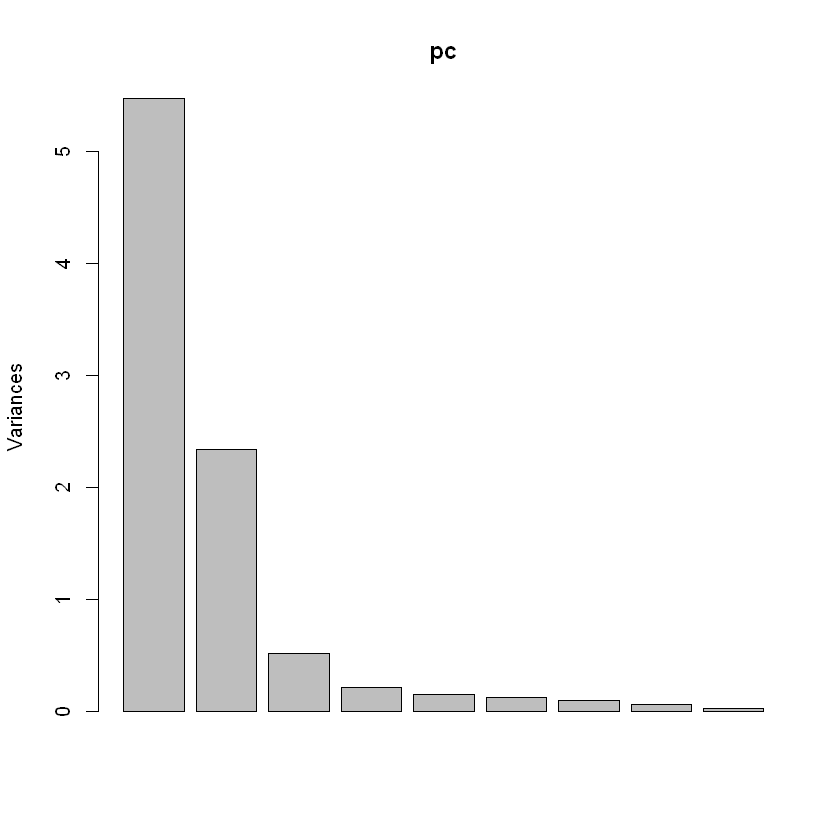

In [5]:
#All dataset
pc <- prcomp(cars,
            center = TRUE, #centers means to 0
            scale = TRUE #set unit variance 0
            )
summary(pc)
plot(pc) #look at the importance of the dataset
pc #correlation of the variables as rotations

In [6]:
predict(pc) %>% round(2) #how cases load on PCs

ERROR: Error in predict(pc) %>% round(2): non trovo la funzione "%>%"


This plot shows:
- Up: Fast cars
- Down: Slow cars
- Right: Big heavy cars
- Left: Small cars with engine more efficent

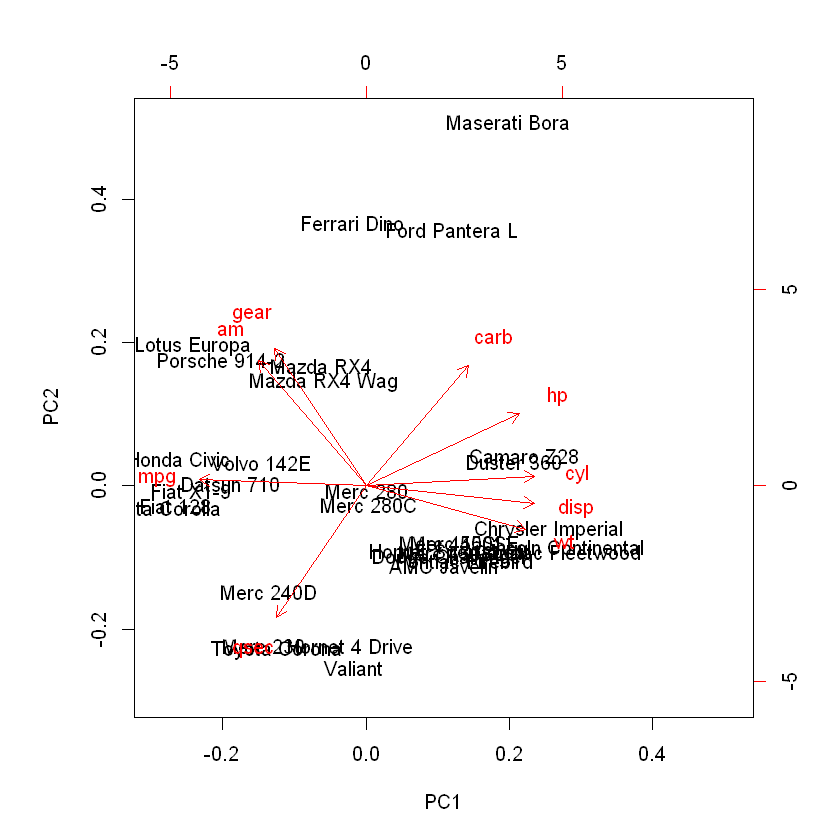

In [7]:
biplot(pc) #2d plot = only first two components

## Regression
$"Out of many variables, one variable"$ cit. R gives good results for regression as P-value adn R squaried coefficients

In [8]:
?USJudgeRatings

In [9]:
head(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6



Call:
lm(formula = RTEN ~ CONT + INTG + DMNR + DILG + CFMG + DECI + 
    PREP + FAMI + ORAL + WRIT + PHYS, data = USJudgeRatings)

Coefficients:
(Intercept)         CONT         INTG         DMNR         DILG         CFMG  
   -2.11943      0.01280      0.36484      0.12540      0.06669     -0.19453  
       DECI         PREP         FAMI         ORAL         WRIT         PHYS  
    0.27829     -0.00196     -0.13579      0.54782     -0.06806      0.26881  



Call:
lm(formula = RTEN ~ CONT + INTG + DMNR + DILG + CFMG + DECI + 
    PREP + FAMI + ORAL + WRIT + PHYS, data = USJudgeRatings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22123 -0.06155 -0.01055  0.05045  0.26079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.11943    0.51904  -4.083 0.000290 ***
CONT         0.01280    0.02586   0.495 0.624272    
INTG         0.36484    0.12936   2.820 0.008291 ** 
DMNR         0.12540    0.08971   1.398 0.172102    
DILG         0.06669    0.14303   0.466 0.644293    
CFMG        -0.19453    0.14779  -1.316 0.197735    
DECI         0.27829    0.13826   2.013 0.052883 .  
PREP        -0.00196    0.24001  -0.008 0.993536    
FAMI        -0.13579    0.26725  -0.508 0.614972    
ORAL         0.54782    0.27725   1.976 0.057121 .  
WRIT        -0.06806    0.31485  -0.216 0.830269    
PHYS         0.26881    0.06213   4.326 0.000146 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

,2.5 %,97.5 %
(Intercept),-3.178010347,-1.06084902
CONT,-0.039955335,0.06554809
INTG,0.101011150,0.62866939
DMNR,-0.057571651,0.30836993
DILG,-0.225031708,0.35841366
CFMG,-0.495940888,0.10688683
DECI,-0.003683181,0.56026904
PREP,-0.491456059,0.48753584
FAMI,-0.680844080,0.40926214
ORAL,-0.017628284,1.11326364


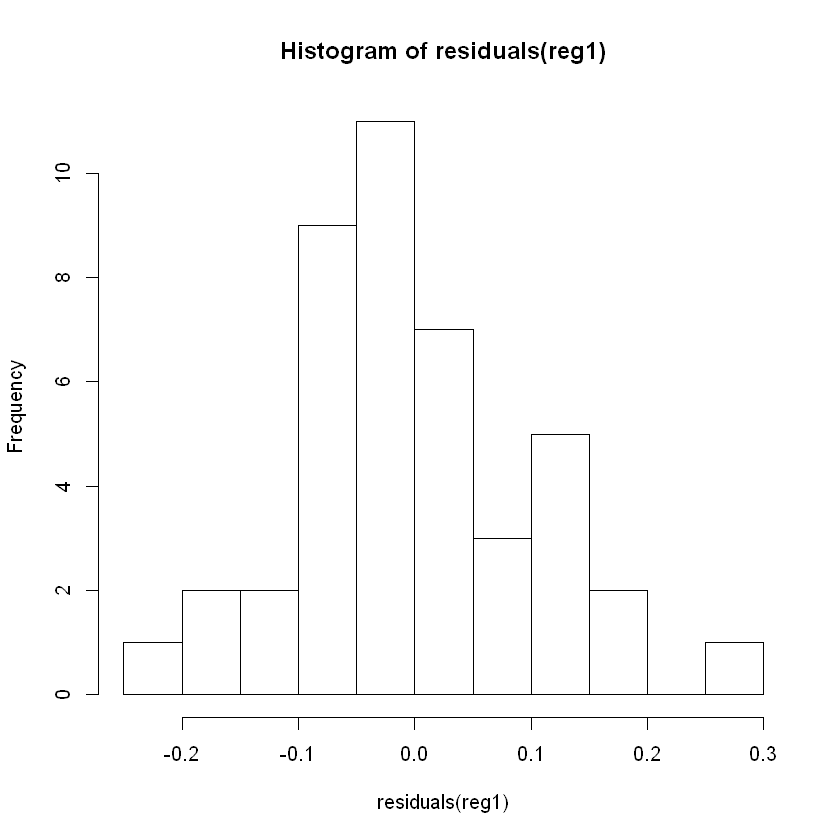

In [13]:
data <- USJudgeRatings

x <- as.matrix(data[-12]) #all columns except 12
y <- data[, 12] #all rows only column 12

reg1 <- lm(y ~ x) #y is function of x

#or specifiying the vaariables
reg1 <- lm (RTEN ~ CONT + INTG + DMNR + DILG + CFMG + DECI + 
            PREP + FAMI + ORAL + WRIT + PHYS, 
            data = USJudgeRatings)

reg1
summary(reg1)
confint(reg1)
hist(residuals(reg1))